In [1]:
import pandas as pd
import numpy as np
import pyreadstat
import glob
import os

# .sav 파일 목록
spss_files = glob.glob(r'./data/*.sav')

# 데이터 저장용 딕셔너리
data_dict = {}

# UTF-8 인코딩 기준으로 파일 로딩
for file in spss_files:
    key = os.path.splitext(os.path.basename(file))[0]

    # 데이터 및 메타 정보 읽기
    df, meta = pyreadstat.read_sav(file, encoding='utf-8', apply_value_formats=True)

    # 컬럼 라벨을 데이터프레임 속성으로 저장
    df.attrs['column_labels'] = meta.column_names_to_labels

    # 딕셔너리에 저장
    data_dict[key] = df

    print(f"[성공] {key} 불러오기 완료. shape: {df.shape}")

[성공] 2019_data 불러오기 완료. shape: (16076, 439)
[성공] 2018_data 불러오기 완료. shape: (16469, 410)
[성공] 2023_data 불러오기 완료. shape: (16196, 365)
[성공] 2024_data 불러오기 완료. shape: (16216, 402)


In [2]:
labels = data_dict['2024_data'].attrs['column_labels']
for col, label in labels.items():
    print(f"{col}: {label}")


pnid: 아이디
MVIT: 한국 방문횟수(평균)
RVIT: 한국 방문횟수(카테고리)
XRVIT: 한국 방문횟수(재방문)
TYP: 여행 형태
Q1: 문1. 주요 방한 목적
Q1_1a1: 문1-1. 한국여행 관심 계기(1순위)
Q1_1a2: 문1-1. 한국여행 관심 계기(2순위)
Q1_1a3: 문1-1. 한국여행 관심 계기(3순위)
Q2a1: 문2. 방문을 고려한 아시아 국가(1순위)
Q2a2: 문2. 방문을 고려한 아시아 국가(2순위)
Q2a3: 문2. 방문을 고려한 아시아 국가(3순위)
Q2a_dk: 문2. 방문을 고려한 아시아 국가(없음)
Q2_1a1: 문2-1. 해당 국가 관심 계기(1순위)
Q2_1a2: 문2-1. 해당 국가 관심 계기(2순위)
Q2_1a3: 문2-1. 해당 국가 관심 계기(3순위)
ZQ2_31: 문2-2. 한국만 방문(카테고리)
ZQ2_32: 문2-2. 한국 방문 직전 타 국가 방문(카테고리)
ZQ2_33: 문2-2. 한국 방문 직후 타 국가 방문(카테고리)
ZQ2_34: 문2-2. 한국 방문 전후 타 국가 방문(카테고리)
Q2_3a2at: 문2-2. 한국방문 직전 방문국가
Q2_3a2bt: 문2-2. 한국방문 직전 방문국가
Q2_3a2ct: 문2-2. 한국방문 직전 방문국가
Q2_3a2dt: 문2-2. 한국방문 직전 방문국가
Q2_3a2et: 문2-2. 한국방문 직전 방문국가
Q2_3a3at: 문2-2. 한국방문 직후 방문국가
Q2_3a3bt: 문2-2. 한국방문 직후 방문국가
Q2_3a3ct: 문2-2. 한국방문 직후 방문국가
Q2_3a3dt: 문2-2. 한국방문 직후 방문국가
Q2_3a3et: 문2-2. 한국방문 직후 방문국가
Q2_3b2a: 문2-2. 한국방문 직전 방문국가(숙박일수)
Q2_3b2b: 문2-2. 한국방문 직전 방문국가(숙박일수)
Q2_3b2c: 문2-2. 한국방문 직전 방문국가(숙박일수)
Q2_3b2d: 문2-2. 한국방문 직전 방문국가(숙박일수)
Q2_3b2e: 문2-2. 한국방문 직전 방문국가(숙박일수)
Q2

In [3]:
# 분석에 쓸만한 데이터 
# 월별, 분기별, 국가별, 성별, 연령별, 방한목적별, 방한횟수별, 여행형태별
# 2023~2024
temp_11 = ['pnid', 'D_MON', 'D_BUN', 'D_NAT', 'D_SEX', 'D_AGE', 'D_MOK', 'D_NUM', 'D_GUB']
# 2021~2022
temp_12 = ['id', 'D_MON', 'D_BUN', 'D_NAT', 'D_SEX', 'D_AGE', 'D_MOK', 'D_Q1', 'D_TYP']
# 2019~2020
temp_13 = ['ID', 'D_MON', 'D_QUA', 'D_COU1', 'D_GEN', 'D_AGE', 'D_Q5_1', 'D_Q1', 'D_Q12']
# 2018
temp_14 = ['ID', 'D_MON', 'D_QUA', 'D_COU', 'D_GEN', 'D_AGE', 'D_Q5_1', 'D_Q1', 'D_Q13']

# 변수명 통일
temp_1_columns = ['ID', 'month', 'quarter', 'country', 'gender', 'age', 'visit_purpose', 'num_visits', 'travel_type']

# 연도별 데이터 키와 temp 키 매핑
year_temp_map = {
    2024: temp_11,
    2023: temp_11,
    # 2022: temp_12,
    # 2021: temp_12,
    # 2020: temp_13,
    2019: temp_13,
    2018: temp_14
}

# 가공된 데이터프레임을 저장할 리스트
df_list = []

for year, temp_key in year_temp_map.items():
    df = data_dict[f'{year}_data'][temp_key].copy()
    df.columns = temp_1_columns
    df['year'] = year
    df_list.append(df)

# 모든 연도 데이터 결합
temp_1_df = pd.concat(df_list, ignore_index=True)
temp_1_df

,ID,month,quarter,country,gender,age,visit_purpose,num_visits,travel_type,year
0,57.0,1 월,1 분 기,인 도 네 시 아,여 성,50 대,여 가/위 락/ 휴 식,4 회 이 상,개 별 여 행,2024
1,58.0,1 월,1 분 기,대 만,여 성,40 대,여 가/위 락/ 휴 식,4 회 이 상,개 별 여 행,2024
2,59.0,1 월,1 분 기,대 만,여 성,30 대,여 가/위 락/ 휴 식,3 회,개 별 여 행,2024
3,60.0,1 월,1 분 기,중 국,남 성,20 대,여 가/위 락/ 휴 식,1 회,개 별 여 행,2024
4,61.0,1 월,1 분 기,대 만,여 성,20 대,여 가/위 락/ 휴 식,4 회 이 상,개 별 여 행,2024
...,...,...,...,...,...,...,...,...,...,...
64952,9004.0,6 월,2 분 기,일 본,여 성,51 - 60 세,여 가/위 락/ 휴 식,1 회,단 체 여 행,2018
64953,9004.0,7 월,3 분 기,일 본,여 성,41 - 50 세,여 가/위 락/ 휴 식,1 회,단 체 여 행,2018
64954,9004.0,8 월,3 분 기,일 본,여 성,51 - 60 세,여 가/위 락/ 휴 식,1 회,단 체 여 행,2018
64955,9004.0,11 월,4 분 기,일 본,여 성,51 - 60 세,여 가/위 락/ 휴 식,4 회 이 상,개 별 여 행,2018


In [4]:
# 만족도, 재방문의사, 타인 추천 의향
# 2023~2024
temp_21 = ['pnid', 'Q11', 'Q13', 'Q14']
# 2021~2022
temp_22 = ['id', 'Q7', 'Q8', 'Q9']
# 2018~2020
temp_23 = ['ID', 'Q15_1', 'Q16', 'Q17']

# 변수명 통일
temp_2_columns = ['ID', 'satisfaction', 'revisit_intent', 'recommend_intent']

# 연도별 데이터 키와 temp 키 매핑
year_temp_map = {
    2024: temp_21,
    2023: temp_21,
    # 2022: temp_22,
    # 2021: temp_22,
    # 2020: temp_23,
    2019: temp_23,
    2018: temp_23,
}

# 가공된 데이터프레임을 저장할 리스트
df_list = []

for year, temp_key in year_temp_map.items():
    df = data_dict[f'{year}_data'][temp_key].copy()
    df.columns = temp_2_columns
    df['year'] = year
    df_list.append(df)

# 모든 연도 데이터 결합
temp_2_df = pd.concat(df_list, ignore_index=True)
temp_2_df

,ID,satisfaction,revisit_intent,recommend_intent,year
0,57.0,⑤ 매우 만족,⑤ 매우 그렇다,⑤ 매우 그렇다,2024
1,58.0,⑤ 매우 만족,⑤ 매우 그렇다,⑤ 매우 그렇다,2024
2,59.0,④ 만족,④ 대체로 그렇다,④ 대체로 그렇다,2024
3,60.0,⑤ 매우 만족,⑤ 매우 그렇다,⑤ 매우 그렇다,2024
4,61.0,④ 만족,⑤ 매우 그렇다,⑤ 매우 그렇다,2024
...,...,...,...,...,...
64952,9004.0,④ 대체로 만족,④ 대체로 그렇다,④ 대체로 그렇다,2018
64953,9004.0,⑤ 매우 만족,⑤ 매우 그렇다,⑤ 매우 그렇다,2018
64954,9004.0,⑤ 매우 만족,⑤ 매우 그렇다,⑤ 매우 그렇다,2018
64955,9004.0,⑤ 매우 만족,⑤ 매우 그렇다,⑤ 매우 그렇다,2018


In [5]:
# 방문권역, 숙박기간, 체재기간
# 2023~2024
temp_31 = ['pnid', 'KWON1', 'KWON2', 'KWON3', 'KWON4', 'KWON5', 'KWON6', 'KWON7', 'KWON8', 'M박HAP', 'M일HAP']
# 2021~2022
temp_32 = ['id', 'KWON1', 'KWON2', 'KWON3', 'KWON4', 'KWON5', 'KWON6', 'KWON7', 'KWON8', 'Q2a1', 'Q2a2']
# 2019~2020
temp_33 = ['ID', 'Q10_1C1', 'Q10_1C2', 'Q10_1C3', 'Q10_1C4', 'Q10_1C5', 'Q10_1C6', 'Q10_1C7', 'Q10_1C8', 'Q10_6A1', 'Q10_6A2']
# 2018
temp_34 = ['ID', 'Q10_1B1', 'Q10_1B2', 'Q10_1B3', 'Q10_1B4', 'Q10_1B5', 'Q10_1B6', 'Q10_1B7', 'Q10_1B8', 'Q10_3A1', 'Q10_3A2']

# 변수명 통일
temp_3_columns = ['ID', 'seoul', 'gyeonggi', 'incheon', 'gangwon', 'chungcheong', 'gyeongsang', 'jeolla', 'jeju', 'stay_duration', 'total_duration']

# 연도별 데이터 키와 temp 키 매핑
year_temp_map = {
    2024: temp_31,
    2023: temp_31,
    # 2022: temp_32,
    # 2021: temp_32,
    # 2020: temp_33,
    2019: temp_33,
    2018: temp_34
}

# 가공된 데이터프레임을 저장할 리스트
df_list = []

for year, temp_key in year_temp_map.items():
    df = data_dict[f'{year}_data'][temp_key].copy()
    df.columns = temp_3_columns
    df['year'] = year
    df_list.append(df)

# 모든 연도 데이터 결합
temp_3_df = pd.concat(df_list, ignore_index=True)
temp_3_df

,ID,seoul,gyeonggi,incheon,gangwon,chungcheong,gyeongsang,jeolla,jeju,stay_duration,total_duration,year
0,57.0,서울,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,6.0,2024
1,58.0,서울,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,5.0,2024
2,59.0,서울,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,6.0,2024
3,60.0,서울,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,6.0,2024
4,61.0,서울,경기도,NaN,NaN,NaN,NaN,NaN,NaN,4.0,5.0,2024
...,...,...,...,...,...,...,...,...,...,...,...,...
64952,9004.0,NaN,NaN,NaN,NaN,NaN,경상,NaN,NaN,3.0,4.0,2018
64953,9004.0,NaN,NaN,NaN,NaN,NaN,경상,NaN,NaN,3.0,4.0,2018
64954,9004.0,NaN,NaN,NaN,NaN,NaN,경상,NaN,NaN,2.0,3.0,2018
64955,9004.0,NaN,NaN,NaN,NaN,NaN,경상,NaN,NaN,3.0,4.0,2018


In [6]:
# 고려한 관광 활동 (1순위)
# 2023~2024
temp_41 = ['pnid', 'Q3_1a1']
# 2018~2020
temp_42 = ['ID', 'Q5_2A1']

# 변수명 통일
temp_4_columns = ['ID', 'planned_activity']

# 연도별 데이터 키와 temp 키 매핑
year_temp_map = {
    2024: temp_41,
    2023: temp_41,
    # 2020: temp_53,
    2019: temp_42,
    2018: temp_42
}

# 가공된 데이터프레임을 저장할 리스트
df_list = []

for year, temp_key in year_temp_map.items():
    df = data_dict[f'{year}_data'][temp_key].copy()
    df.columns = temp_4_columns
    df['year'] = year
    df_list.append(df)

# 모든 연도 데이터 결합
temp_4_df = pd.concat(df_list, ignore_index=True)
temp_4_df


,ID,planned_activity,year
0,57.0,식도락(음식/미식) 관광,2024
1,58.0,유흥(나이트라이프 활동 및 카지노),2024
2,59.0,오락(놀이공원 및 테마파크 방문 등,2024
3,60.0,유흥(나이트라이프 활동 및 카지노),2024
4,61.0,식도락(음식/미식) 관광,2024
...,...,...,...
64952,9004.0,음식/미식 탐방,2018
64953,9004.0,음식/미식 탐방,2018
64954,9004.0,템플스테이 태권도 등 한국 전통 문화 체험,2018
64955,9004.0,음식/미식 탐방,2018


In [7]:
# 인당 지출 경비 (비중을 구해볼 것, 숙박, 식음료비, 쇼핑비)
# 2023~2024
temp_51 = ['pnid', '총액1인TOT2', '숙박비1인대체', '음식점1인대체', '쇼핑비1인대체']
# 2021~2022
temp_52 = ['id', '총액1인TOT', '', '', '']
# 2018~2020
temp_53 = ['ID', 'Q14_1T', 'Q14_2_1', 'Q14_2_3', 'Q14_2_4']

# 변수명 통일
temp_5_columns = ['ID', 'total_expense', 'accommodation_cost', 'food_cost', 'shopping_cost']

# 연도별 데이터 키와 temp 키 매핑
year_temp_map = {
    2024: temp_51,
    2023: temp_51,
    # 2020: temp_53,
    2019: temp_53,
    2018: temp_53
}

# 가공된 데이터프레임을 저장할 리스트
df_list = []

for year, temp_key in year_temp_map.items():
    df = data_dict[f'{year}_data'][temp_key].copy()
    df.columns = temp_5_columns
    df['year'] = year
    df_list.append(df)

# 모든 연도 데이터 결합
temp_5_df = pd.concat(df_list, ignore_index=True)
temp_5_df

,ID,total_expense,accommodation_cost,food_cost,shopping_cost,year
0,57.0,2710.0000,1000.000000,500.000000,500.000000,2024
1,58.0,1364.6750,202.462020,121.477212,485.908848,2024
2,59.0,1065.9000,161.475534,161.475534,322.951068,2024
3,60.0,922.6800,279.177005,209.382753,139.588502,2024
4,61.0,1647.3000,161.468340,32.293668,968.810037,2024
...,...,...,...,...,...,...
64952,9004.0,601.1940,NaN,163.962000,91.090000,2018
64953,9004.0,595.8480,NaN,162.504000,45.140000,2018
64954,9004.0,518.4040,NaN,151.946000,62.566000,2018
64955,9004.0,390.3471,182.161980,86.743800,86.743800,2018


In [8]:
# 항목별 만족도 (식도락, 자연경관, 역사유적지, 언어소통, 치안, 여행경비, 숙박시설, 대중교통, 길찾기)
# 2023~2024
temp_61 = ['pnid', 'Q12a01', 'Q12a03', 'Q12a05', 'Q12a18', 'Q12a19', 'Q12a20', 'Q12a21', 'Q12a22', 'Q12a23']
# 2021~2022
temp_62 = ['', '', '', '', '', '', '', '', ''] # 없음
# 2018~2020
# 음식, 관광지 매력도, 언어소통, 치안, 여행경비, 숙박, 대중교통, 길찾기
temp_63 = ['ID', 'Q15_2A5', 'Q15_2A8', 'Q15_2A8', 'Q15_2A9', 'Q15_2A11', 'Q15_2A10', 'Q15_2A4', 'Q15_2A2', 'Q15_2A3']

# 변수명 통일
temp_6_columns = ['ID', 'food', 'landscape', 'heritage', 'language', 'safety', 'budget', 'accommodation', 'transport', 'navigation']

# 연도별 데이터 키와 temp 키 매핑
year_temp_map = {
    2024: temp_61,
    2023: temp_61,
    # 2020: temp_63,
    2019: temp_63,
    2018: temp_63
}

# 가공된 데이터프레임을 저장할 리스트
df_list = []

for year, temp_key in year_temp_map.items():
    df = data_dict[f'{year}_data'][temp_key].copy()
    df.columns = temp_6_columns
    df['year'] = year
    df_list.append(df)

# 모든 연도 데이터 결합
temp_6_df = pd.concat(df_list, ignore_index=True)
temp_6_df

,ID,food,landscape,heritage,language,safety,budget,accommodation,transport,navigation,year
0,57.0,NaN,⑤ 매우 만족,NaN,⑤ 매우 만족,⑤ 매우 만족,⑤ 매우 만족,⑤ 매우 만족,⑤ 매우 만족,⑤ 매우 만족,2024
1,58.0,⑤ 매우 만족,NaN,④ 만족,④ 만족,④ 만족,④ 만족,④ 만족,④ 만족,④ 만족,2024
2,59.0,⑤ 매우 만족,NaN,NaN,③ 보통,⑤ 매우 만족,⑤ 매우 만족,⑤ 매우 만족,⑤ 매우 만족,③ 보통,2024
3,60.0,⑤ 매우 만족,⑤ 매우 만족,⑤ 매우 만족,⑤ 매우 만족,⑤ 매우 만족,⑤ 매우 만족,⑤ 매우 만족,⑤ 매우 만족,⑤ 매우 만족,2024
4,61.0,NaN,NaN,④ 만족,③ 보통,④ 만족,④ 만족,④ 만족,④ 만족,③ 보통,2024
...,...,...,...,...,...,...,...,...,...,...,...
64952,9004.0,⑤ 매우 만족,④ 대체로 만족,④ 대체로 만족,④ 대체로 만족,⑤ 매우 만족,⑤ 매우 만족,⑤ 매우 만족,④ 대체로 만족,⑤ 매우 만족,2018
64953,9004.0,④ 대체로 만족,⑤ 매우 만족,⑤ 매우 만족,⑤ 매우 만족,⑤ 매우 만족,⑤ 매우 만족,④ 대체로 만족,⑤ 매우 만족,④ 대체로 만족,2018
64954,9004.0,⑤ 매우 만족,④ 대체로 만족,④ 대체로 만족,⑤ 매우 만족,⑤ 매우 만족,⑤ 매우 만족,⑤ 매우 만족,④ 대체로 만족,ⓞ 해당 없음,2018
64955,9004.0,⑤ 매우 만족,⑤ 매우 만족,⑤ 매우 만족,⑤ 매우 만족,⑤ 매우 만족,⑤ 매우 만족,③ 보통,⑤ 매우 만족,⑤ 매우 만족,2018


In [9]:
# 데이터 전체
total_columns = temp_1_columns + temp_2_columns + temp_3_columns + temp_4_columns + temp_5_columns + temp_6_columns

# 연도별 데이터 키와 temp 키 매핑
year_temp_map = {
    2024: temp_11 + temp_21 + temp_31 + temp_41 + temp_51 + temp_61,
    2023: temp_11 + temp_21 + temp_31 + temp_41 + temp_51 + temp_61,
    # 2020: temp_13 + temp_23 + temp_33 + temp_53 + temp_63,
    2019: temp_13 + temp_23 + temp_33 + temp_42 + temp_53 + temp_63,
    2018: temp_14 + temp_23 + temp_34 + temp_42 + temp_53 + temp_63
}

# 가공된 데이터프레임을 저장할 리스트
df_list = []

for year, temp_key in year_temp_map.items():
    df = data_dict[f'{year}_data'][temp_key].copy()
    df.columns = total_columns
    df['year'] = year
    df_list.append(df)

# 모든 연도 데이터 결합
total_df = pd.concat(df_list, ignore_index=True)
total_df = total_df.loc[:, ~total_df.columns.duplicated()]
total_df

,ID,month,quarter,country,gender,age,visit_purpose,num_visits,travel_type,satisfaction,...,food,landscape,heritage,language,safety,budget,accommodation,transport,navigation,year
0,57.0,1 월,1 분 기,인 도 네 시 아,여 성,50 대,여 가/위 락/ 휴 식,4 회 이 상,개 별 여 행,⑤ 매우 만족,...,NaN,⑤ 매우 만족,NaN,⑤ 매우 만족,⑤ 매우 만족,⑤ 매우 만족,⑤ 매우 만족,⑤ 매우 만족,⑤ 매우 만족,2024
1,58.0,1 월,1 분 기,대 만,여 성,40 대,여 가/위 락/ 휴 식,4 회 이 상,개 별 여 행,⑤ 매우 만족,...,⑤ 매우 만족,NaN,④ 만족,④ 만족,④ 만족,④ 만족,④ 만족,④ 만족,④ 만족,2024
2,59.0,1 월,1 분 기,대 만,여 성,30 대,여 가/위 락/ 휴 식,3 회,개 별 여 행,④ 만족,...,⑤ 매우 만족,NaN,NaN,③ 보통,⑤ 매우 만족,⑤ 매우 만족,⑤ 매우 만족,⑤ 매우 만족,③ 보통,2024
3,60.0,1 월,1 분 기,중 국,남 성,20 대,여 가/위 락/ 휴 식,1 회,개 별 여 행,⑤ 매우 만족,...,⑤ 매우 만족,⑤ 매우 만족,⑤ 매우 만족,⑤ 매우 만족,⑤ 매우 만족,⑤ 매우 만족,⑤ 매우 만족,⑤ 매우 만족,⑤ 매우 만족,2024
4,61.0,1 월,1 분 기,대 만,여 성,20 대,여 가/위 락/ 휴 식,4 회 이 상,개 별 여 행,④ 만족,...,NaN,NaN,④ 만족,③ 보통,④ 만족,④ 만족,④ 만족,④ 만족,③ 보통,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64952,9004.0,6 월,2 분 기,일 본,여 성,51 - 60 세,여 가/위 락/ 휴 식,1 회,단 체 여 행,④ 대체로 만족,...,⑤ 매우 만족,④ 대체로 만족,④ 대체로 만족,④ 대체로 만족,⑤ 매우 만족,⑤ 매우 만족,⑤ 매우 만족,④ 대체로 만족,⑤ 매우 만족,2018
64953,9004.0,7 월,3 분 기,일 본,여 성,41 - 50 세,여 가/위 락/ 휴 식,1 회,단 체 여 행,⑤ 매우 만족,...,④ 대체로 만족,⑤ 매우 만족,⑤ 매우 만족,⑤ 매우 만족,⑤ 매우 만족,⑤ 매우 만족,④ 대체로 만족,⑤ 매우 만족,④ 대체로 만족,2018
64954,9004.0,8 월,3 분 기,일 본,여 성,51 - 60 세,여 가/위 락/ 휴 식,1 회,단 체 여 행,⑤ 매우 만족,...,⑤ 매우 만족,④ 대체로 만족,④ 대체로 만족,⑤ 매우 만족,⑤ 매우 만족,⑤ 매우 만족,⑤ 매우 만족,④ 대체로 만족,ⓞ 해당 없음,2018
64955,9004.0,11 월,4 분 기,일 본,여 성,51 - 60 세,여 가/위 락/ 휴 식,4 회 이 상,개 별 여 행,⑤ 매우 만족,...,⑤ 매우 만족,⑤ 매우 만족,⑤ 매우 만족,⑤ 매우 만족,⑤ 매우 만족,⑤ 매우 만족,③ 보통,⑤ 매우 만족,⑤ 매우 만족,2018


In [10]:
# 연도별 최초방문/재방문비율
revisit_df = total_df[['year', 'num_visits']].copy()
revisit_df['num_visits_int'] = revisit_df['num_visits'].str.extract(r'(\d+)')

total_per_year = revisit_df.groupby('year').size()
once_per_year = revisit_df[revisit_df['num_visits_int'] == '1'].groupby('year').size()

# 비율 계산
revisit_df_final = pd.DataFrame({
    'year': total_per_year.index,
    'total': total_per_year.values,
    'first_visit': once_per_year.reindex(total_per_year.index, fill_value=0).values
})
revisit_df_final['first_visit_rate'] = np.round((revisit_df_final['first_visit'] / revisit_df_final['total']) * 100, 2)
revisit_df_final['revisit_rate'] = np.round(100 - revisit_df_final['first_visit_rate'], 2)
revisit_df_final

,year,total,first_visit,first_visit_rate,revisit_rate
0,2018,16469,7773,47.20,52.80
1,2019,16076,7268,45.21,54.79
2,2023,16196,7900,48.78,51.22
3,2024,16216,7778,47.96,52.04


In [11]:
# 연도별 평균 숙박일자, 체류일자
duration_df = total_df[['stay_duration', 'total_duration', 'year']].copy()
duration_df = duration_df[
    duration_df['stay_duration'].between(0, 60) &
    duration_df['total_duration'].between(0, 60)
]
np.round(duration_df.groupby('year').mean(), 4)

,stay_duration,total_duration
year,,
2018,6.9271,7.9477
2019,6.3307,7.3371
2023,7.7112,8.7112
2024,6.6371,7.6371


# 최종데이터 전처리

In [12]:
# 데이터 전처리
import re
from pandas.api.types import CategoricalDtype
import warnings
warnings.filterwarnings('ignore')

# 데이터 숫자로 변환하기
output_df = total_df.copy()
for col in ['month', 'quarter', 'num_visits']:
    output_df[col] = output_df[col].str.extract(r'(\d+)').astype("Int64")

# 공백 제거
for col in output_df.columns:
    if output_df[col].dtype == 'object' or output_df[col].dtype == 'category':
        output_df[col] = output_df[col].str.replace(r'[\s]+', '', regex=True)

# 국적
output_df['country'] = output_df['country'].str.replace('전체', '')
country_super_group = {
    '중국': '동아시아',
    '일본': '동아시아',
    '대만': '동아시아',
    '홍콩': '동아시아',
    '몽골': '동아시아',
    '태국': '동남아시아',
    '베트남': '동남아시아',
    '말레이시아': '동남아시아',
    '싱가포르': '동남아시아',
    '필리핀': '동남아시아',
    '인도네시아': '동남아시아',
    '인도': '중동 및 인도',
    '중동': '중동 및 인도',
    '미국': '영어권',
    '캐나다': '영어권',
    '호주': '영어권',
    '영국': '영어권',
    '프랑스': '유럽',
    '독일': '유럽',
    '러시아': '유럽',
    '기타': '기타'
}

country_mapping = {
    '동아시아': 1,
    '동남아시아': 2,
    '중동 및 인도': 3,
    '영어권': 4,
    '유럽': 5,
    '기타': 99}
output_df['country'] = output_df['country'].replace(country_super_group).replace(country_mapping).astype('category')

# 연령
age_mapping = {'15-20세': 1, '15-19세': 1, '10대' : 1,
               '21-30세': 2, '20대': 2, 
               '31-40세': 3, '30대': 3, 
               '41-50세': 4, '40대': 4, 
               '51-60세': 5, '50대': 5, 
               '61세이상': 6, '60대이상': 6}
output_df['age'] = output_df['age'].replace(age_mapping)
age_order = CategoricalDtype(categories=[1, 2, 3, 4, 5, 6], ordered=True)
output_df['age'] = output_df['age'].astype(age_order)

# 성별
output_df['gender'] = output_df['gender'].replace({'남성': 1, '여성': 2}).astype('category')

# 여행 유형
activity_mapping = {
    'K-POP/한류스타관련팬미팅,촬영지등경험': 1,
    'K-POP/한류스타관련공연장및드라마/영화촬영지방문': 1,
    '연극,뮤지컬,발레등공연관람': 1,
    '고궁/역사유적지방문': 2,
    '박물관,전시관관람': 2,
    '역사/문화유적탐방': 2,
    '역사/문화유적/전통문화체험': 2,
    '자연풍경감상': 2,
    '자연경관감상': 2,
    '전통문화체험(한복체험,태권도,한국음식만들기등)': 2,
    '템플스테이태권도등한국전통문화체험': 2,
    '지역축제참여': 2,
    '음식/미식탐방': 3,
    '식도락(음식/미식)관광': 3,
    '쇼핑': 4,
    '레저및스포츠활동': 5,
    '스포츠/레포츠관람(야구,축구,농구등)': 5,
    '스포츠/레포츠참가(스키,수영,골프,캠핑,등반,자전거,래프팅등)': 5,
    '뷰티/미용관광(마사지샵,헤어샵,네일케어등방문)': 6,
    '치료및미용서비스': 6,
    '치료및미용서비스체험': 6,
    '치료/건강검진(피부과,성형외과,내외과입원,수술등)': 6,
    '휴양/휴식(웰니스)': 6,
    '휴가시간': 6,
    '유흥(나이트라이프활동및카지노)': 7,
    '유흥/놀이시설': 7,
    '유흥/놀이시설체험': 7,
    '오락(놀이공원및테마파크방문등': 7,
    '패션,유행등세련된현대문화': 8,
    '패션,유행등세련된현대문화체험': 8,
    '친구,친지방문': 99,
    '경제적인여행비용': 99,
    '숙박/교통등관광편리성및안전성': 99,
    '자국과의이동거리': 99,
    '기후/뚜렷한사계절': 99,
    '기타': 99
}
output_df['planned_activity'] = output_df['planned_activity'].replace(activity_mapping).astype('category')

# 방문목적
purpose_mapping = {
    '여가/위락/휴식': 1,
    '사업또는전문활동': 2,
    '사업/전문활동': 2,
    '친구/친지방문': 3,
    '교육': 4,
    '종교및순례': 5,
    '기타': 99
}
output_df['visit_purpose'] = output_df['visit_purpose'].replace(purpose_mapping).astype('category')

# 여행 유형
travel_type_mapping = {
    '개별여행': 1,
    '단체여행': 2,
    'Air-telTour': 3,
    'AIR-TEL': 3
}
output_df['travel_type'] = output_df['travel_type'].replace(travel_type_mapping).astype('category')

# 만족도
satisfaction_mapping = {
    '⑤매우만족': 5,
    '④만족': 4,
    '④대체로만족': 4,
    '③보통': 3,
    '②불만족': 2,
    '②대체로불만족': 2,
    '①매우불만족': 1,
    'ⓞ해당없음' : pd.NA
}
output_df['satisfaction'] = output_df['satisfaction'].replace(satisfaction_mapping)

# 세부 만족도
cols = ['food', 'landscape', 'heritage', 'language', 'safety', 
        'budget', 'accommodation', 'transport', 'navigation']
for col in cols:
    output_df[col] = output_df[col].map(satisfaction_mapping).astype('Int64')

# 재방문의도, 추천의도
revisit_recommend_intent_mapping = {
    '⑤매우그렇다': 5,
    '④대체로그렇다': 4,
    '③보통': 3,
    '②별로그렇지않다': 2,
    '①전혀그렇지않다': 1
}
output_df['revisit_intent'] = output_df['revisit_intent'].replace(revisit_recommend_intent_mapping)
output_df['recommend_intent'] = output_df['recommend_intent'].replace(revisit_recommend_intent_mapping)

# 지역 방문 여부
output_df[['seoul', 'gyeonggi', 'incheon', 'gangwon', 'chungcheong', 'gyeongsang', 'jeolla', 'jeju']] = output_df[['seoul', 'gyeonggi', 'incheon', 'gangwon', 'chungcheong', 'gyeongsang', 'jeolla', 'jeju']].notna().astype(int)

In [13]:
# 파생변수
# 재방문여부
output_df['revisit_indicator'] = output_df['num_visits'].apply(lambda x : 0 if int(x) == 1 else 1)

# 지방 방문여부
output_df['temp_flag'] = output_df[['seoul', 'gyeonggi', 'incheon', 'gangwon', 'chungcheong', 'gyeongsang', 'jeolla', 'jeju']].sum(axis=1)

cond1 = (output_df['seoul'] == 1) & (output_df['temp_flag'] == 1)
cond2 = (output_df['seoul'] == 1) & (output_df['temp_flag'] > 1)
output_df['visit_local_indicator'] = 2 # 지방만 방문
output_df.loc[cond1, 'visit_local_indicator'] = 0 # 서울만 방문
output_df.loc[cond2, 'visit_local_indicator'] = 1 # 서울+지방 방문
output_df['visit_local_indicator'] = output_df['visit_local_indicator'].astype('category')
output_df.drop('temp_flag', axis=1, inplace=True)

# 총 여행 지출액 대비 세부 항목의 비중
output_df['accommodation_percent'] = output_df['accommodation_cost'] / output_df['total_expense']
output_df['food_percent'] = output_df['food_cost'] / output_df['total_expense']
output_df['shopping_percent'] = output_df['shopping_cost'] / output_df['total_expense']

In [14]:
# 데이터 필터링
# 60일 초과 체류인원 삭제
output_df = output_df[output_df['stay_duration'].between(0, 60)]

# 방문목적 여행만 + 방문유형 개별여행만
output_df = output_df[(output_df['visit_purpose'] == 1) & (output_df['travel_type'] == 1)]


In [15]:
output_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32064 entries, 0 to 64955
Data columns (total 42 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   ID                     32064 non-null  float64 
 1   month                  32064 non-null  Int64   
 2   quarter                32064 non-null  Int64   
 3   country                32064 non-null  category
 4   gender                 32064 non-null  category
 5   age                    32064 non-null  category
 6   visit_purpose          32064 non-null  category
 7   num_visits             32064 non-null  Int64   
 8   travel_type            32064 non-null  category
 9   satisfaction           32064 non-null  int64   
 10  revisit_intent         32064 non-null  int64   
 11  recommend_intent       32064 non-null  int64   
 12  seoul                  32064 non-null  int64   
 13  gyeonggi               32064 non-null  int64   
 14  incheon                32064 non-null  int6

In [16]:
col_names_dict = {
    'ID': '응답자 ID',
    'year': '조사연도',
    'month': '방한월',
    'quarter': '방한분기',
    'country': '국적',
    'gender': '성별',
    'age': '연령대',
    'visit_purpose': '방한목적',
    'num_visits': '방한횟수',
    'revisit_indicator': '재방문여부',
    'travel_type': '여행형태',
    'satisfaction': '전반적 만족도',
    'revisit_intent': '재방문의사',
    'recommend_intent': '추천의향',
    'visit_local_indicator': '지방 방문 여부',
    'seoul': '서울 방문 여부',
    'gyeonggi': '경기 방문 여부',
    'incheon': '인천 방문 여부',
    'gangwon': '강원 방문 여부',
    'chungcheong': '충청 방문 여부',
    'gyeongsang': '경상 방문 여부',
    'jeolla': '전라 방문 여부',
    'jeju': '제주 방문 여부',
    'planned_activity': '쇼핑비',
    'stay_duration': '한국 체류일수',
    'total_duration': '총 여행일수',
    'total_expense': '총 지출액',
    'accommodation_cost': '숙박비',
    'food_cost': '음식비',
    'shopping_cost': '쇼핑비',
    'accommodation_percent': '총 지출액 대비 숙박비',
    'food_percent': '총 지출액 대비 음식비',
    'shopping_percent': '총 지출액 대비 쇼핑비',
    'food': '식도락 만족도',
    'landscape': '자연경관 만족도',
    'heritage': '역사유적지 만족도',
    'language': '언어소통 만족도',
    'safety': '치안 만족도',
    'budget': '여행경비 만족도',
    'accommodation': '숙박시설 만족도',
    'transport': '대중교통 만족도',
    'navigation': '길찾기 용이성 만족도'
}

In [17]:
ordered_cols = list(col_names_dict.keys())
output_df = output_df[ordered_cols]
output_df.to_csv('./관광데이터.csv', header=True, encoding='cp949')
# output_df.rename(columns=col_names_dict)

In [18]:
# 가설 1. 한국 재방문비율은 COVID-19 이전과 비교하여 유의미한 차이가 있을 것이다.
from scipy.stats import chi2_contingency
revisit_df = output_df[['year', 'revisit_indicator']].copy()
revisit_df['covid_indicator'] = output_df['year'].apply(lambda x : 1 if x > 2020 else 0)
contingency = pd.crosstab(revisit_df['covid_indicator'], revisit_df['revisit_indicator'])

# 카이제곱 검정
chi2, p, df, expected = chi2_contingency(contingency)

# 결과 출력
print(f"카이제곱 통계량:, {chi2:.3f}")
print(f"p값:, {p:.3f}")
print(f"자유도:, {df}")

# 행 기준 비율표 (소수점 → 퍼센트 변환)
percent_table = pd.crosstab(revisit_df['covid_indicator'], revisit_df['revisit_indicator'], normalize='index') * 100
percent_table = percent_table.round(1)
combined = contingency.astype(str) + " (" + percent_table.astype(str) + "%)"
print(f"관측빈도:\n {combined}")

카이제곱 통계량:, 85.460
p값:, 0.000
자유도:, 1
관측빈도:
 revisit_indicator             0             1
covid_indicator                              
0                  7872 (47.7%)  8616 (52.3%)
1                  8242 (52.9%)  7334 (47.1%)


In [19]:
# 가설 2. 한국 체류기간은 COVID-19 이전과 비교하여 유의미한 차이가 있을 것이다.
from scipy.stats import ttest_ind, levene
stay_df = output_df[['year', 'stay_duration']].copy()
stay_df['covid_indicator'] = stay_df['year'].apply(lambda x : 1 if x > 2020 else 0)
pre = stay_df[stay_df['covid_indicator'] == 0]['stay_duration']
post = stay_df[stay_df['covid_indicator'] == 1]['stay_duration']

# Levene 등분산성 검정
stat, p = levene(pre, post)

print(f"Levene 등분산성 검정 통계량:, {stat:.3f}")
print(f"p값:, {p:.3f}")

# 독립표본 t 검정
t_stat, p = ttest_ind(pre, post, equal_var=False)

# 결과 출력
print(f"t-통계량:, {t_stat:.3f}")
print(f"p값:, {p:.3f}")
print(f"집단 별 평균\npre : {np.mean(pre):.3f} \npost : {np.mean(post):.3f} \n")

Levene 등분산성 검정 통계량:, 50.742
p값:, 0.000
t-통계량:, 1.937
p값:, 0.053
집단 별 평균
pre : 6.784 
post : 6.635 



In [20]:
# 가설 3. 서울만 여행한 사람보다 서울 근교+지방도 함께 여행한 사람이 여행 만족도가 높을 것이다.
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# 분석 대상 변수들
cols = ['satisfaction', 'revisit_intent', 'recommend_intent']

# 분석용 데이터프레임 준비
anova_df = output_df[['visit_local_indicator'] + cols].copy()

# ANOVA 결과 저장용 딕셔너리
anova_results = {}

# ANOVA 반복 수행
for col in cols:
    formula = f'{col} ~ C(visit_local_indicator)'
    model = ols(formula, data=anova_df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    anova_results[col] = anova_table

# ANOVA 결과 출력
for col, result in anova_results.items():
    print(f"\n[{col}에 대한 ANOVA 결과]")
    print(result)

# 집단별 평균 출력
group_summary = (
    output_df
    .groupby('visit_local_indicator')
    .agg(
        count=('visit_local_indicator', 'size'), 
        satisfaction_mean=('satisfaction', 'mean'),
        revisit_intent_mean=('revisit_intent', 'mean'),
        recommend_intent_mean=('recommend_intent', 'mean')
    )
    .round(4)
)
print("\n[집단별 평균 요약]")
print(group_summary)

# Tukey HSD 사후검정
for col in cols:
    print(f"\n[{col}에 대한 Tukey HSD 결과]")
    tukey = pairwise_tukeyhsd(endog=anova_df[col],
                              groups=anova_df['visit_local_indicator'],
                              alpha=0.05)
    print(tukey.summary())



[satisfaction에 대한 ANOVA 결과]
                                sum_sq       df          F        PR(>F)
C(visit_local_indicator)    148.032434      2.0  206.90242  5.228286e-90
Residual                  11469.338699  32061.0        NaN           NaN

[revisit_intent에 대한 ANOVA 결과]
                                sum_sq       df          F        PR(>F)
C(visit_local_indicator)     94.213037      2.0  82.873052  1.263001e-36
Residual                  18224.043418  32061.0        NaN           NaN

[recommend_intent에 대한 ANOVA 결과]
                                sum_sq       df           F         PR(>F)
C(visit_local_indicator)    245.435806      2.0  314.148079  7.706192e-136
Residual                  12524.216889  32061.0         NaN            NaN

[집단별 평균 요약]
                       count  satisfaction_mean  revisit_intent_mean  \
visit_local_indicator                                                  
0                      16993             4.5174               4.4373   
1              

In [21]:
# 가설 3-2. 서울만 여행한 사람보다 서울 근교+지방도 함께 여행한 사람이 tp여행 만족도가 높을 것이다.
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# 분석 대상 변수들
cols = ['food', 'landscape', 'heritage', 'language', 'safety', 
        'budget', 'accommodation', 'transport', 'navigation']

# 분석용 데이터프레임
analysis_df = output_df[['visit_local_indicator'] + cols].copy()

# 반복 수행: 각 세부 만족도 항목에 대해 ANOVA, 집단별 평균, Tukey HSD 출력
for col in cols:
    print(f"[{col}에 대한 분석]")

    # 변수별 결측값 제거
    anova_df = analysis_df[['visit_local_indicator'] + [col]].dropna().copy()

    # ANOVA
    formula = f'{col} ~ C(visit_local_indicator)'
    model = ols(formula, data=anova_df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    print("\n[ANOVA 결과]")
    print(anova_table)

    # 집단별 평균 및 표준편차
    group_summary = (
        anova_df.groupby('visit_local_indicator')[col]
        .agg(['count', 'mean', 'std'])
        .round(4)
        .rename(columns={'mean': 'mean', 'std': 'std'})
    )
    print("\n[집단별 평균 및 표준편차]")
    print(group_summary)

    # Tukey HSD 사후검정
    tukey = pairwise_tukeyhsd(endog=anova_df[col],
                              groups=anova_df['visit_local_indicator'],
                              alpha=0.05)
    print("\n[Tukey HSD 결과]")
    print(tukey.summary())


[food에 대한 분석]

[ANOVA 결과]
                                sum_sq       df          F        PR(>F)
C(visit_local_indicator)     88.185904      2.0  95.799513  3.417796e-42
Residual                  13144.185021  28558.0        NaN           NaN

[집단별 평균 및 표준편차]
                       count    mean     std
visit_local_indicator                       
0                      15225  4.4826  0.6701
1                       9420  4.4722  0.6835
2                       3916  4.3177  0.6983

[Tukey HSD 결과]
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1  -0.0104 0.4688 -0.0313  0.0104  False
     0      2   -0.165    0.0 -0.1934 -0.1365   True
     1      2  -0.1545    0.0 -0.1847 -0.1243   True
----------------------------------------------------
[landscape에 대한 분석]

[ANOVA 결과]
                                sum_sq       df          F        PR(>F)
C(visit_local_indicato

# 클러스터링

In [22]:
output_df.columns

Index(['ID', 'year', 'month', 'quarter', 'country', 'gender', 'age',
       'visit_purpose', 'num_visits', 'revisit_indicator', 'travel_type',
       'satisfaction', 'revisit_intent', 'recommend_intent',
       'visit_local_indicator', 'seoul', 'gyeonggi', 'incheon', 'gangwon',
       'chungcheong', 'gyeongsang', 'jeolla', 'jeju', 'planned_activity',
       'stay_duration', 'total_duration', 'total_expense',
       'accommodation_cost', 'food_cost', 'shopping_cost',
       'accommodation_percent', 'food_percent', 'shopping_percent', 'food',
       'landscape', 'heritage', 'language', 'safety', 'budget',
       'accommodation', 'transport', 'navigation'],
      dtype='object')

PCA 차원별 반복: 100%|██████████| 3/3 [00:42<00:00, 14.24s/it]

   n_components  n_clusters  silhouette_score
4             3           7          0.545229
5             3           8          0.516674
7             3          10          0.511917
6             3           9          0.504785
3             3           6          0.501446


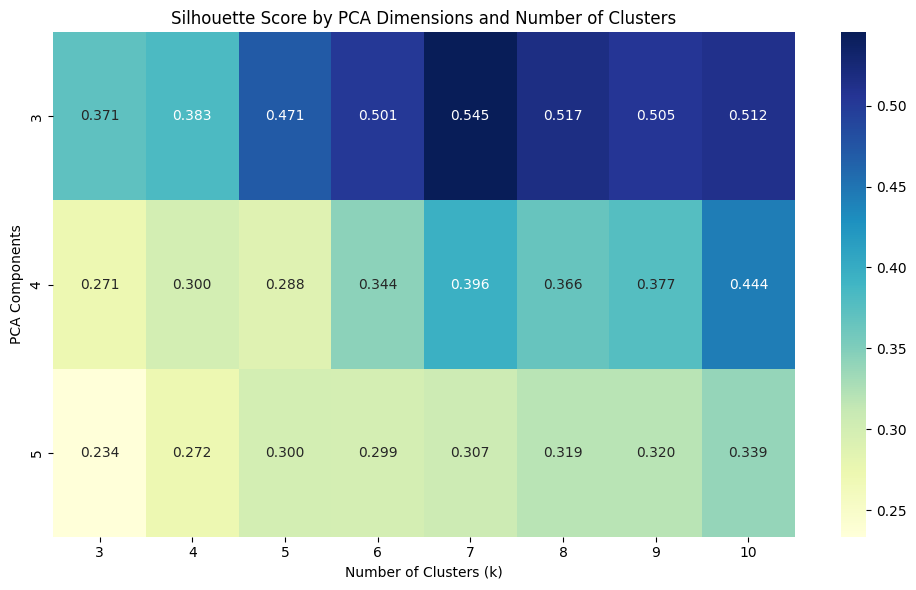

In [47]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from tqdm import tqdm

# 변수 구분
categorical_cols = ['country', 'gender', 'age',
                    'revisit_indicator', 'visit_local_indicator', 'planned_activity']
for col in categorical_cols:
    output_df[col] = output_df[col].astype(str)

numerical_cols = [
    'stay_duration', 'accommodation_percent', 'food_percent', 'shopping_percent', 'food',
    'landscape', 'heritage', 'language', 'safety', 'budget',
    'accommodation', 'transport', 'navigation'
]

# 전처리기 정의
preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
    ('num', MinMaxScaler(), numerical_cols)
])

# 결측값 제거
output_df_clean = output_df.dropna(subset=categorical_cols + numerical_cols)
X_preprocessed = preprocessor.fit_transform(output_df_clean)

# 실험 범위 정의
pca_dims = [3, 4, 5]
k_values = [3, 4, 5, 6, 7, 8, 9, 10]

results = []

# 반복 실험
for n_components in tqdm(pca_dims, desc="PCA 차원별 반복"):
    X_reduced = PCA(n_components=n_components, random_state=42).fit_transform(X_preprocessed)

    for k in k_values:
        model = KMeans(n_clusters=k, random_state=42)
        labels = model.fit_predict(X_reduced)
        score = silhouette_score(X_reduced, labels)
        results.append({
            'n_components': n_components,
            'n_clusters': k,
            'silhouette_score': score
        })

# 결과 정리
result_df = pd.DataFrame(results)
result_df = result_df.sort_values(by='silhouette_score', ascending=False)

# 출력
import seaborn as sns
import matplotlib.pyplot as plt

print(result_df.head())

# 시각화
pivot_table = result_df.pivot(index='n_components', columns='n_clusters', values='silhouette_score')

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt=".3f", cmap='YlGnBu')
plt.title('Silhouette Score by PCA Dimensions and Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('PCA Components')
plt.tight_layout()
plt.show()

In [31]:
from scipy.stats import skew, kurtosis

# 기술통계 계산
desc = output_df_clean[numerical_cols].describe().T 

# 왜도와 첨도 계산
desc['skewness'] = output_df_clean[numerical_cols].skew()
desc['kurtosis'] = output_df_clean[numerical_cols].kurt()
desc = desc[['mean', 'std', 'min', 'max', 'skewness', 'kurtosis']]
desc

,mean,std,min,max,skewness,kurtosis
stay_duration,7.00568,7.562927,0.0,60.0,3.99856,20.2539
accommodation_percent,0.243532,0.158499,0.0,1.0,0.772245,0.730894
food_percent,0.356958,0.227107,0.0,1.0,0.58952,-0.391054
shopping_percent,0.195001,0.122942,0.0,1.0,1.419076,4.081657
food,4.407488,0.7076,1.0,5.0,-1.088609,1.205084
landscape,4.459437,0.673647,1.0,5.0,-1.073285,0.968388
heritage,4.455874,0.675337,1.0,5.0,-1.065933,0.945014
language,4.029744,0.926633,1.0,5.0,-0.742478,0.098748
safety,4.355383,0.767896,1.0,5.0,-1.152345,1.339546
budget,3.983114,0.873935,1.0,5.0,-0.60615,0.086336


In [48]:
# best PCA 적용
pca = PCA(n_components=3).fit(X_preprocessed)
print("explained_variance_ratio :", pca.explained_variance_ratio_.sum())
X_reduced = pca.fit_transform(X_preprocessed)

# 클러스터링
kmeans = KMeans(n_clusters=7, random_state=42)
output_df_clean['cluster'] = kmeans.fit_predict(X_reduced)

# 평가 (Silhouette Score)
score = silhouette_score(X_reduced, output_df_clean['cluster'])
print(f"Silhouette Score (PCA=5): {score:.4f}")

# 클러스터별 개수 확인
print(output_df_clean['cluster'].value_counts())

# 클러스터별 분석
print("\n[범주형 변수 분포]")
print(output_df_clean.groupby('cluster')[categorical_cols].value_counts().head(10))

print("\n[연속형 변수 평균]")
print(output_df_clean.groupby('cluster')[numerical_cols].mean())

explained_variance_ratio : 0.3632371775357145
Silhouette Score (PCA=5): 0.5452
cluster
3    4160
2    3111
4    2885
6    2692
5    2412
1    2106
0    1999
Name: count, dtype: int64

[범주형 변수 분포]
cluster  country  gender  age  revisit_indicator  visit_local_indicator  planned_activity
0        1        2       2    1                  1                      3.0                 67
                                                                         4.0                 64
         2        2       2    1                  1                      4.0                 55
                                                                         3.0                 54
         1        2       4    1                  1                      3.0                 51
                          3    1                  1                      4.0                 47
                                                  2                      2.0                 47
         2        2       2    1          